# Auto insurance industry

The project involves the use of a dataset with 600k training data and 57 features/data. In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target column signifies whether a claim was filed for that policy holder.

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')
data.drop(['id'], axis=1, inplace=True)
print('Shape of the data = ', data.shape)
print('Total records = ', len(data))
data.head()

Shape of the data =  (595212, 58)
Total records =  595212


,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


We are dropped ID because they are unique to record and they doesn't affect data. as their sole perpose is to identify the data

In [3]:
data=data.replace(-1, np.nan)
data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1. Write at least 3 important inferences from the data above

In [4]:
data_report=sweetviz.analyze([data,'interval_data'], target_feat='target')
data_report.show_html('data_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:15  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   13:32  -> (00:00 left)


Creating Associations graph... DONE!
Report data_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## 1 There are two distinct target values
## 2 There are 57 features
## 3 Data is highly imbalanced
## 4 

# 2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?

In [5]:
'''Checking imbalanced data'''
data_1=data[data['target']==1]
data_0=data[data['target']==0]
print(f'Total data with value as "1" is {len(data_1)} and that is {round(len(data_1)/len(data)*100,2)}%')
print(f'Total data with value as "0" is {len(data_0)} and that is {round(len(data_0)/len(data)*100,2)}%')
if (len(data_1)/len(data)*100)<30 or (len(data_0)/len(data)*100)<30:
    print(r'Data is imbalanced ("not in proprtion")')
else:
    print(r'Data is balanced ("in proprtion")')

Total data with value as "1" is 21694 and that is 3.64%
Total data with value as "0" is 573518 and that is 96.36%
Data is imbalanced ("not in proprtion")


In [6]:
mdata = []
i=0
for i in data.columns:
         
    # Defining the level
    if ('bin' in i or i == 'target'):
        level = 'binary'
    elif ('cat' in i):
        level = 'categorical'
    elif (data[i].dtype == float) and ('bin' not in i) and ('cat' not in i):
        level = 'continuous'
    elif 'bin' not in i and 'cat' not in i:
        level = 'ordinal'
            
    # Defining the data type 
    dtype = data[i].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': i,
        'level': level,
        'dtype': dtype
    }
    mdata.append(f_dict)
    
meta = pd.DataFrame(mdata, columns=['varname', 'level', 'dtype'])
#meta.set_index('varname', inplace=True)
print(meta)

           varname        level    dtype
0           target       binary    int64
1        ps_ind_01      ordinal    int64
2    ps_ind_02_cat  categorical  float64
3        ps_ind_03      ordinal    int64
4    ps_ind_04_cat  categorical  float64
5    ps_ind_05_cat  categorical  float64
6    ps_ind_06_bin       binary    int64
7    ps_ind_07_bin       binary    int64
8    ps_ind_08_bin       binary    int64
9    ps_ind_09_bin       binary    int64
10   ps_ind_10_bin       binary    int64
11   ps_ind_11_bin       binary    int64
12   ps_ind_12_bin       binary    int64
13   ps_ind_13_bin       binary    int64
14       ps_ind_14      ordinal    int64
15       ps_ind_15      ordinal    int64
16   ps_ind_16_bin       binary    int64
17   ps_ind_17_bin       binary    int64
18   ps_ind_18_bin       binary    int64
19       ps_reg_01   continuous  float64
20       ps_reg_02   continuous  float64
21       ps_reg_03   continuous  float64
22   ps_car_01_cat  categorical  float64
23   ps_car_02_c

# 3. How many categorical features are there?

In [7]:
level_gp=meta.groupby('level')
print('Total number of categorical values = ',len(level_gp.get_group('categorical')))

Total number of categorical values =  14


# 4. How many binary features are there?

In [8]:
print('Total number of binary values = ',len(level_gp.get_group('binary')))

Total number of binary values =  18


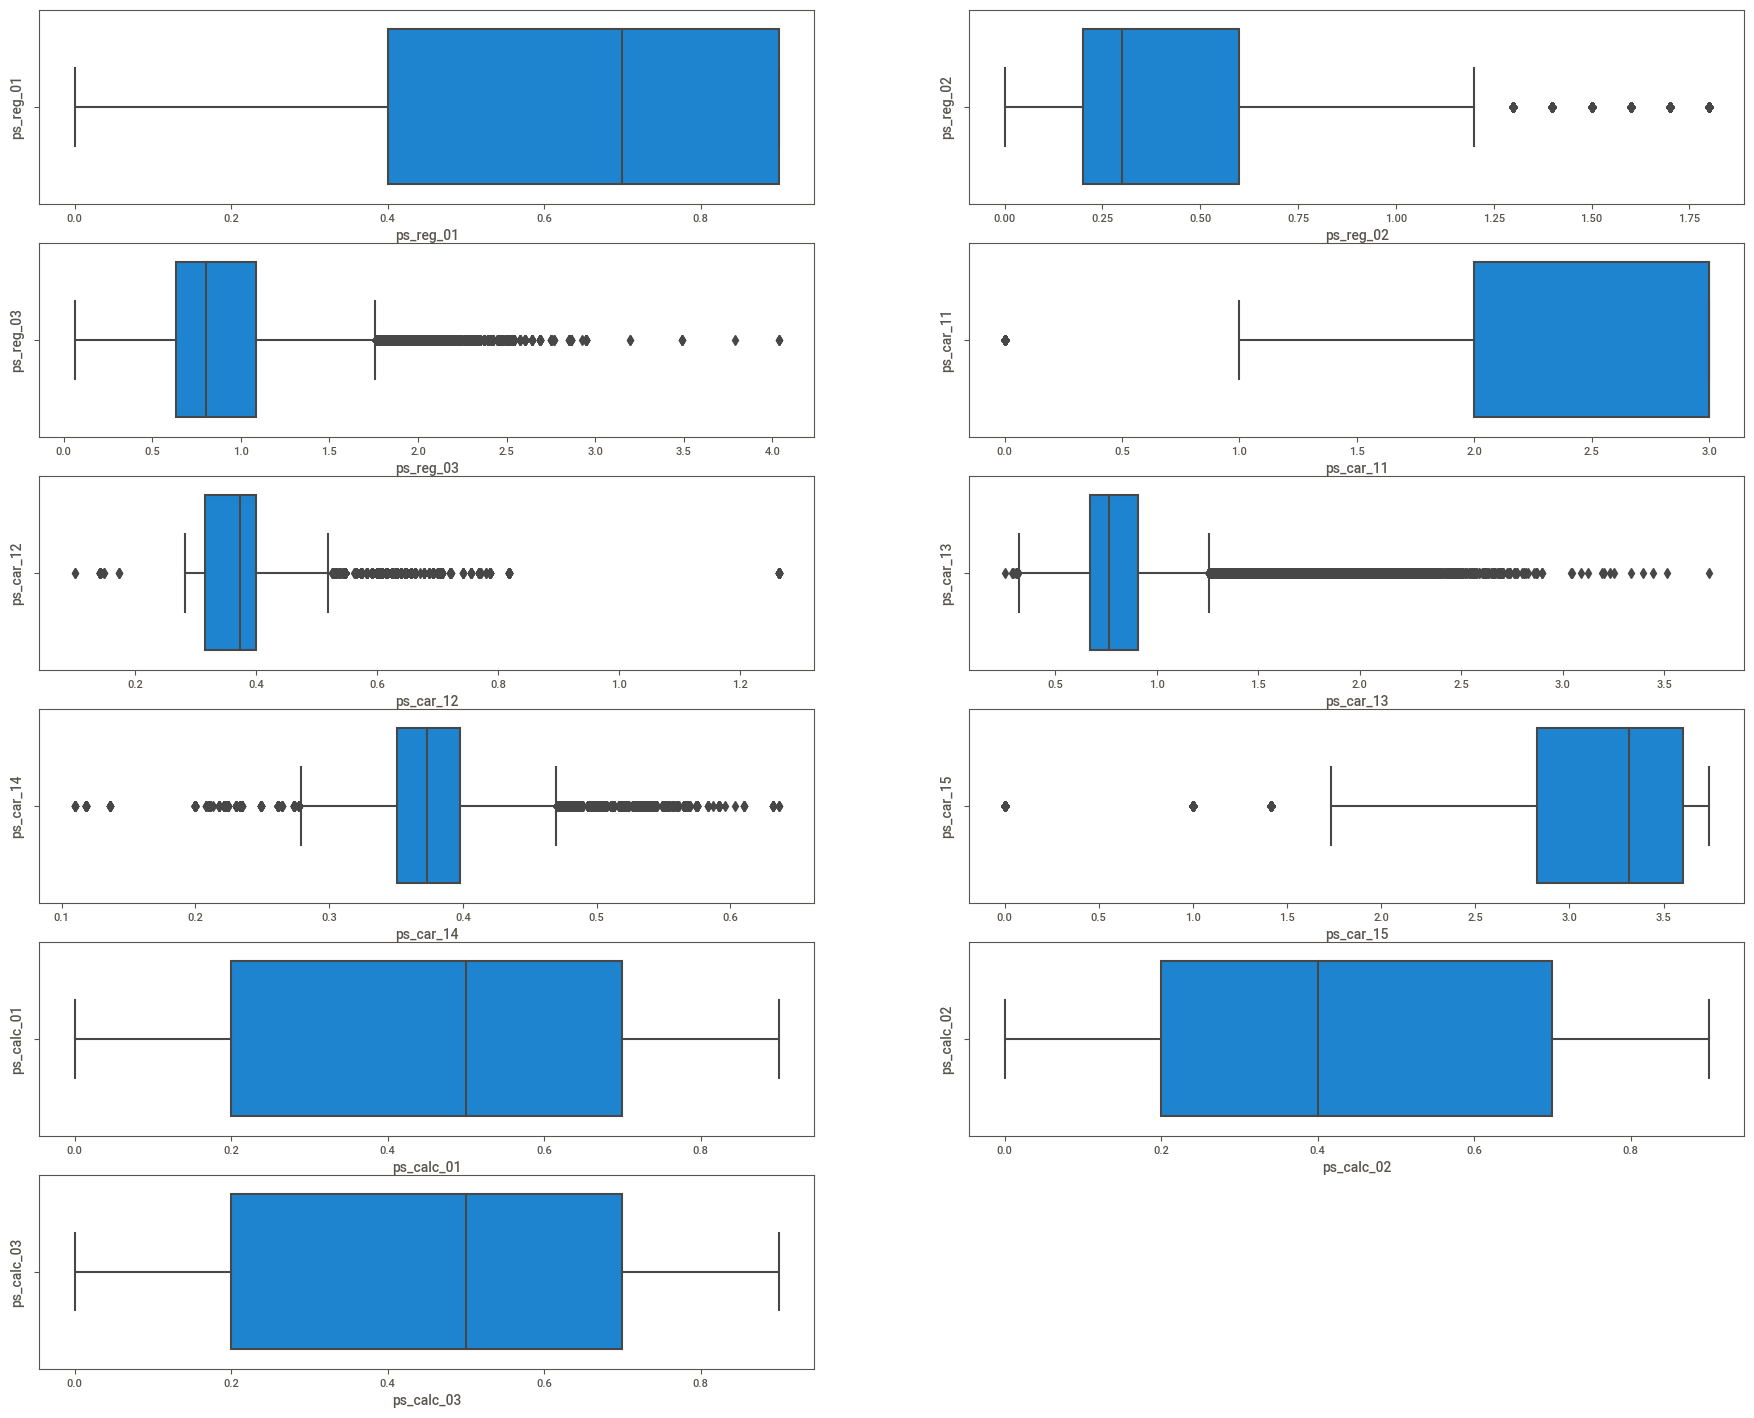

In [9]:
interval_col=list(level_gp.get_group('continuous')['varname'])
interval_data=data[interval_col]
plt.figure(figsize=(22,18))

for i in range (len(interval_col)):
    plt.subplot((len(interval_col)/2+1),2,i+1)
    sns.boxplot(data[interval_col[i]])
    plt.ylabel(interval_col[i])

#plt.subplot(2,2,1)
#sns.boxplot(data['ps_reg_01'])

# 5. Write inferences from data on interval variables.

In [10]:
interval_col=list(level_gp.get_group('continuous')['varname'])
interval_data=data[interval_col]
interval_data['target']=data['target']
interval_report=sweetviz.analyze([interval_data,'interval_data'], target_feat='target')
interval_report.show_html('interval_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:25  -> (00:00 left)


Creating Associations graph... DONE!
Report interval_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


For ps_reg_02 the frequency of target is increasing gradually.
For calc_01, calc_02, calc_03 and reg_01 the target is distributed equally.
for reg_03, car_12, car_13, it looks like the target value is more
ps_cal_01, ps_cal_02, ps_cal_03, ps_reg_01, ps_car_11 and ps_car_15 have less negligible outliers
rest of the features have too many outliers.


# 6. Write inferences from data on ordinal variables.

In [11]:
ordinal_col=list(level_gp.get_group('ordinal')['varname'])
ordinal_data=data[ordinal_col]
ordinal_data['target']=data['target']
ordinal_report=sweetviz.analyze([ordinal_data,'ordinal_data'], target_feat='target')
ordinal_report.show_html('ordinal_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:32  -> (00:00 left)


Creating Associations graph... DONE!
Report ordinal_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# 7. Write inferences from data on binary variables.


In [12]:
binary_col=list(level_gp.get_group('binary')['varname'])
binary_data=data[binary_col]
binary_data['target']=data['target']
binary_report=sweetviz.analyze([binary_data,'binary_data'], target_feat='target')
binary_report.show_html('binary_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   01:55  -> (00:00 left)


Creating Associations graph... DONE!
Report binary_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance

In [13]:
# from question 2 above
if (len(data_1)/len(data)*100)<30 or (len(data_0)/len(data)*100)<30:
    print(r'Data is imbalanced ("not in proprtion")')
else:
    print(r'Data is balanced ("in proprtion")')

Data is imbalanced ("not in proprtion")


# 11. Which are the top two features in terms of missing values?
# 12. In total, how many features have missing values?
# 13. What steps should be taken to handle the missing data?
# Q9 will be continues after Q15

Missing data in numbers are as given below
ps_ind_02_cat       216
ps_ind_04_cat        83
ps_ind_05_cat      5809
ps_reg_03        107772
ps_car_01_cat       107
ps_car_03_cat    411231
ps_car_05_cat    266551
ps_car_07_cat     11489
ps_car_09_cat       569
ps_car_11             5
ps_car_12             1
ps_car_14         42620
dtype: int64


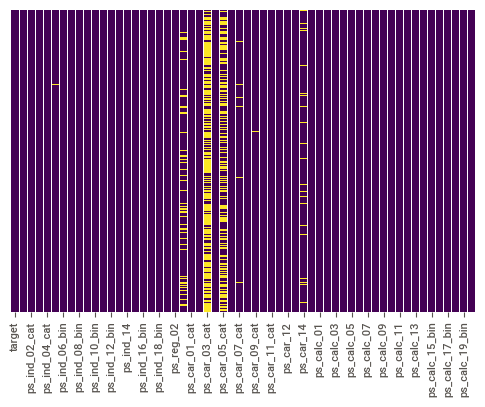

In [14]:
missing_data=data.isnull().sum(axis=0)
print('Missing data in numbers are as given below')
missing_data=missing_data[missing_data>0]
print(missing_data)
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# yellow little horizontal line in the below graph shows the null value

In [15]:
missing_data_p=missing_data/len(data)*100
print('The columns with null values in percentage is as given below :- ')
print(missing_data_p)

The columns with null values in percentage is as given below :- 
ps_ind_02_cat     0.036290
ps_ind_04_cat     0.013945
ps_ind_05_cat     0.975955
ps_reg_03        18.106490
ps_car_01_cat     0.017977
ps_car_03_cat    69.089837
ps_car_05_cat    44.782531
ps_car_07_cat     1.930237
ps_car_09_cat     0.095596
ps_car_11         0.000840
ps_car_12         0.000168
ps_car_14         7.160474
dtype: float64


#### Here we see that the top teo feature with missing values are column ps_car_03_cat and ps_car_05_cat and we should drop them.

#### for other continous value, we will replace it with mean of thir respective columns

#### for for ordinal value, we will replace it with the mode values.

#### However we will replace the values after seperating the data into those who claimed with those who didn't as they fall under two different groups

In [16]:
data=data.drop(['ps_car_03_cat','ps_car_05_cat'], axis=1)

imp_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mode=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

def to_impute(dataf, column):
    for i in column:
        if dataf[i].dtype==float:
            dataf[i]=imp_mean.fit_transform(dataf[[i]])
        elif dataf[i].dtype==int and i!='target':
            dataf[i]=imp_mode.fit_transform(dataf[[i]])
        
    
    return dataf  

data=pd.concat([to_impute(data_1, data_1.columns), to_impute(data_0, data_0.columns)], axis=0)
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
9,1,1,1.0,2,0.0,0.0,0,1,0,0,...,3,5,0,6,0,1,0,0,1,0
19,1,0,1.0,2,1.0,0.0,1,0,0,0,...,10,3,1,11,0,1,1,0,1,0
28,1,0,2.0,0,1.0,4.0,1,0,0,0,...,3,2,0,8,0,1,1,0,0,0
39,1,2,1.0,3,1.0,0.0,0,0,1,0,...,6,0,8,14,0,1,0,1,0,0
41,1,5,2.0,1,0.0,0.0,0,0,1,0,...,5,2,0,7,1,1,0,0,0,0


# 14. Which interval variables have strong correlation?

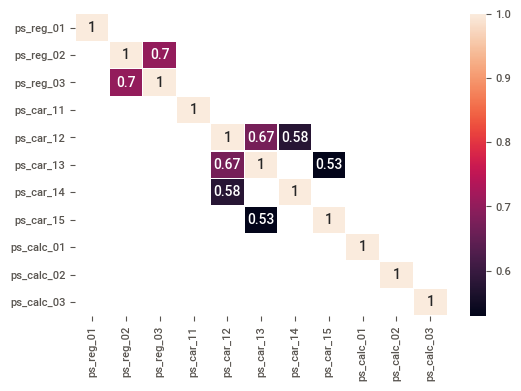

In [17]:
interval_data=data[interval_col]
corr_interval=interval_data.corr()
sns.heatmap(corr_interval[corr_interval>0.5], xticklabels=corr_interval.columns, yticklabels=corr_interval.columns,annot=True, linewidths=.2)

### correlation of the feature are as given below
#### ps_reg_02 and ps_reg_03 = 0.7
#### ps_car_12 and ps_car_13 = 0.67
#### ps_car_12 and ps_car_14 = 0.58
#### ps_car_13 and ps_car_15 = 0.53
#### other features have correlation less than 0.50

# 15. What's the level of correlation among ordinal features?

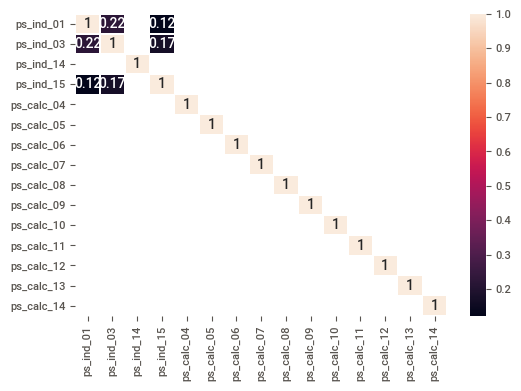

In [18]:
ordinal_data=data[ordinal_col]
corr_ordinal=ordinal_data.corr()
sns.heatmap(corr_ordinal[corr_ordinal>0.01], xticklabels=corr_ordinal.columns, yticklabels=corr_ordinal.columns,annot=True, linewidths=.4)

#### The feature for ordinal values have very less correlation

# 16. Implement Hot Encoding for categorical features

In [19]:
categorical_col=list(level_gp.get_group('categorical')['varname'])
categorical_data=data[categorical_col]
print(categorical_data.shape)
categorical_data.head()

(595212, 14)


,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
9,1.0,0.0,0.0,11.0,0,0.000000,1,0.000000,14,1.0,1,2.0,1,104
19,1.0,1.0,0.0,7.0,1,0.648593,0,0.527488,1,1.0,1,2.0,1,64
28,2.0,1.0,4.0,4.0,0,0.648593,0,1.000000,6,1.0,1,0.0,1,104
39,1.0,1.0,0.0,6.0,1,0.648593,0,0.527488,1,1.0,1,0.0,1,38
41,2.0,0.0,0.0,11.0,0,0.648593,0,0.527488,10,1.0,1,2.0,1,89


In [20]:
#ohe_cat=pd.get_dummies(categorical_data['ps_ind_02_cat'], prefix='ps_ind_02_cat')
ohe_cat=pd.get_dummies(data=categorical_data, columns=categorical_col, drop_first=True)
print(ohe_cat.shape)
ohe_cat.head()

(595212, 177)


,ps_ind_02_cat_1.3590806185487894,ps_ind_02_cat_1.3788214648563775,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.416019725599336,ps_ind_04_cat_0.4427311758459905,ps_ind_04_cat_1.0,ps_ind_05_cat_0.41062455890868066,ps_ind_05_cat_0.6444130127298444,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
39,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 17. In nominal and interval features, which features are suitable for StandardScaler?


#### We should use interval feature for standardscaler as there are many outliers in it and if we use minmax scaler for it, the intermediate data will ahev very negligible difference.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_scaler=StandardScaler()
interval_data_scaled=pd.DataFrame(std_scaler.fit_transform(interval_data), columns=interval_data.columns)
print(interval_data_scaled.head())

   ps_reg_01  ps_reg_02  ps_reg_03  ps_car_11  ps_car_12  ps_car_13  \
0   1.004750   2.376704   4.551067  -0.415740   1.153809   2.871569   
1   1.004750  -0.344291  -1.572569   0.785475  -1.109263  -1.552493   
2  -1.428828  -0.344291   0.187437  -0.415740   1.153809  -0.414092   
3  -1.081174  -1.086380   0.086363   0.785475  -1.092966  -0.325484   
4   0.657096  -0.344291  -0.260820  -0.415740   0.126094   0.937867   

   ps_car_14  ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  
0   0.354173   0.737869    0.871328    1.221398    1.219390  
1  -0.305907  -4.192020    0.871328   -0.521411   -0.870090  
2   1.522210  -0.574471    1.219520   -0.172849   -1.218337  
3  -0.337462   0.544464    0.871328   -0.521411    0.522897  
4   0.772859   0.737869   -1.217824    0.872836    0.174650  


([<matplotlib.axis.XTick at 0x1fc97e77188>,
 <a list of 14 Text major ticklabel objects>)

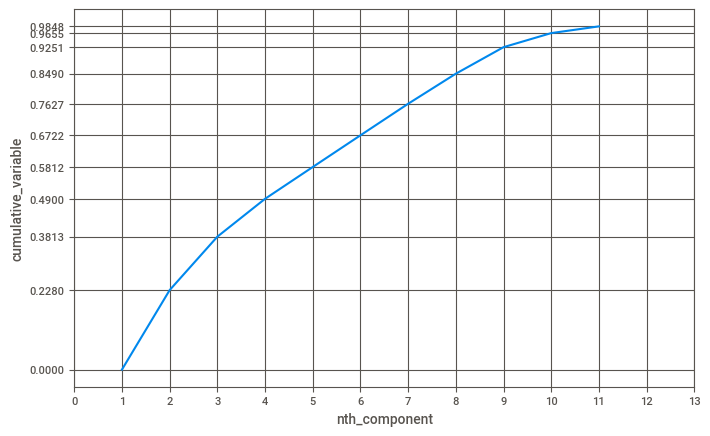

In [22]:
pca=PCA()
#pca.fit(interval_data_scaled)

x_pca=pca.fit_transform(interval_data_scaled)
var_exp=pca.explained_variance_ratio_

cumulative_variable=[]
nth_component=[]
for i in range (len(var_exp)):
    cumulative_variable.append(var_exp[0:i].sum())
    nth_component.append(i+1)

plt.figure(figsize=(8,5))    
plt.plot(nth_component, cumulative_variable)
plt.xlabel('nth_component')
plt.ylabel('cumulative_variable')
plt.grid(which='both', axis='both')
#plt.yticks(np.arange(0.0, 1, 0.05))
plt.yticks(cumulative_variable)
plt.xticks(np.arange(0,14,1))

#### With 9 componenets we can have a variance of 92% and that will reduce our 2 feature
#### we will do PCA for dimension reduction with n_components =9
#### reference https://youtu.be/n7npKX5zIWI

In [23]:
pca=PCA(n_components=9)
pca.fit(interval_data_scaled)
x_pca=pca.transform(interval_data_scaled)
int_data_pca=pd.DataFrame(x_pca)
int_data_pca.head()

,0,1,2,3,4,5,6,7,8
0,5.048113,2.281937,-0.006126,-1.146353,1.506130,0.523855,1.736757,1.067024,0.401926
1,-2.917107,1.109295,2.435316,1.171819,-0.013408,0.683728,-2.783007,-0.198828,0.478956
2,0.404935,-1.454792,1.516882,1.297032,0.161706,1.158127,0.116747,1.063657,-0.532891
3,-1.160598,-0.545594,-1.213880,0.475253,1.026656,-0.227338,-0.033361,0.935005,-0.642617
4,0.849476,-0.703857,-0.210735,-1.249064,-0.840705,-0.110160,0.293483,-1.091242,-0.317573


In [24]:
''' As we have scaled the data and have done with one hot
encoding we should replace the respectie feature with their counterparts'''
#interval_data_scaled has to be added
#ohe_cat has to be added
data1=data.drop(interval_data.columns, axis=1) #dropping interval data
data2=data1.drop(categorical_data.columns, axis=1) # dropping categorical data
data3=pd.concat([data2, ohe_cat, int_data_pca], axis=1)
data3.head()
data3.to_csv('clean_imbalanced_data.csv')

# 9. What should be the preferred way in this case to balance the data?
### Question 11, 12, 13, 14 and 15needs to be fixed before balancing the data as the function may give error

#### We should do oversampling as the number of records with 1 is very less or SMOTEK
#### if we oversample the date, we may loose important data as there are too many records

In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# 10. How many training records are there after achieving a balance of 12%?

In [26]:
os_random=RandomOverSampler(0.12, random_state=9)
y_train=data3['target']
x_train=data3.drop(['target'], axis=1)
x_train_os, y_train_os=os_random.fit_sample(x_train, y_train)
print('The number of classes before fit {}'.format(Counter(y_train)))
print('The number of classes after fit {}'.format(Counter(y_train_os)))

The number of classes before fit Counter({0: 573518, 1: 21694})
The number of classes after fit Counter({0: 573518, 1: 68822})


#### Though we have can achieve the balance of 12%, we need more samples to balance the data and to get that, we can use SMOTE as used below

In [27]:
y_train=data3['target']
x_train=data3.drop(['target'], axis=1)
x_resampled, y_resampled = SMOTE().fit_sample(x_train, y_train)
print('The number of classes before fit {}'.format(Counter(y_train)))
print('The number of classes after fit {}'.format(Counter(y_resampled)))

The number of classes before fit Counter({0: 573518, 1: 21694})
The number of classes after fit Counter({0: 573518, 1: 573518})


In [28]:
n_data=pd.concat([y_resampled, x_resampled], axis=1)
n_data.head()

,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,...,ps_car_11_cat_104,0,1,2,3,4,5,6,7,8
0,0,2,5,0,1,0,0,0,0,0,...,0,5.048113,2.281937,-0.006126,-1.146353,1.506130,0.523855,1.736757,1.067024,0.401926
1,0,1,7,0,0,1,0,0,0,0,...,0,-2.917107,1.109295,2.435316,1.171819,-0.013408,0.683728,-2.783007,-0.198828,0.478956
2,0,5,9,0,0,1,0,0,0,0,...,0,0.404935,-1.454792,1.516882,1.297032,0.161706,1.158127,0.116747,1.063657,-0.532891
3,0,0,2,1,0,0,0,0,0,0,...,1,-1.160598,-0.545594,-1.213880,0.475253,1.026656,-0.227338,-0.033361,0.935005,-0.642617
4,0,0,0,1,0,0,0,0,0,0,...,0,0.849476,-0.703857,-0.210735,-1.249064,-0.840705,-0.110160,0.293483,-1.091242,-0.317573


In [29]:
n_data.to_csv('data.csv', index=False)

# 11. Is there any improvement in scores after encoding?
## Question of modelling list. as we have to test modelling before the encoding
## in the modelling it was observed that adaboost was best.
## here the encoding was done for the categorical, so we will be using it without encoding.

In [30]:
data_before_enc=pd.concat([data2, categorical_data, int_data_pca], axis=1)

In [31]:
import time
def conf_mat(y_act,y_pre):
    t0, f1, f0, t1= confusion_matrix(y_act, y_pre).ravel()
    print(t0, f1, f0, t1)
    return
#    accuracy=(t0+t1)/(t0+t1+f0+f1)
#    precision=(t1)/(t1+f1)
#    recall=(t1)/(t1+t0)
#    f1_score=(2*precision*recall)/(precision+recall)
#    return np.round((accuracy*100, recall*100, precision*100, f1_score*100,t0, f1, f0, t1),2) 



from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
y_data=data_before_enc['target']
x_data=data_before_enc.drop(['target'], axis=1)
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size=0.30, random_state=0)
abc_class=AdaBoostClassifier(n_estimators=30, learning_rate=.01, random_state=0)
start_time=time.time()
abc_class.fit(x_train, y_train)
abc_predict=abc_class.predict(x_test)
tt_time=round(time.time()-start_time,2)
conf_mat(y_test, abc_predict)
#abc_acc, abc_recall, abc_preci, abc_f1,t0, f1, f0, t1=conf_mat(y_test, abc_predict)
#tt_time=round(time.time()-start_time,2)
#mat_ada=('ada_boost',abc_acc, abc_recall, abc_preci, abc_f1, t0, f1, f0, t1,tt_time)
#print(f'Accuracy of the abc = {abc_acc}%\n')
#print(f'Recall of the abc = {abc_recall}%\n')
#print(f'Precision of the abc = {abc_preci}%\n')
#print(f'F1 score of the abc = {abc_f1}%\n')
#print(f'Time to train {tt_time} s \n')

172085 0 6479 0


## using data without modelling for adaboost is giving 0 for trure positive and true negative and as we see that it's unable to predict the values correctly, therefore using the model without encoding is not good.

# 18. Summarize the learnings of ED
## 1 Using varioue tools it was possible to find the type of data columns
## 2 Data had missing data and that was filled with mean or mode
## 3 Data was balanced using imbalance
